In [2]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

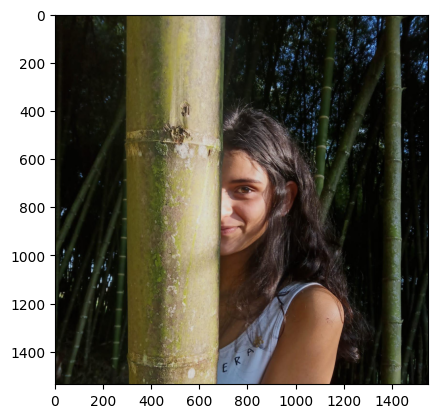

In [3]:
img=cv.imread('Sunnylady.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

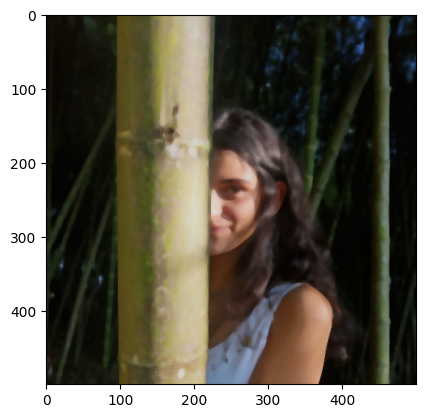

In [4]:
imgrez=cv.resize(img,dsize=(500,500))
imgrez= cv.medianBlur(imgrez, 7)
plt.imshow(cv.cvtColor(imgrez, cv.COLOR_BGR2RGB))

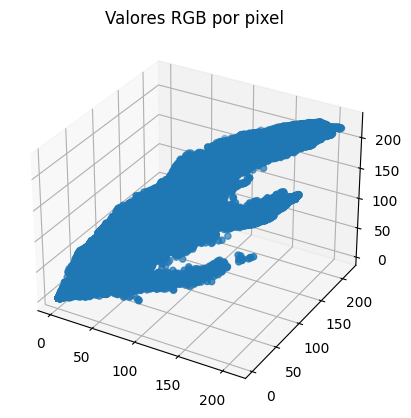

In [5]:
eje=plt.axes(projection="3d")
eje.scatter3D(imgrez[:,:,0],imgrez[:,:,1],imgrez[:,:,2])
eje.set_title('Valores RGB por pixel')
plt.show()

In [7]:
imgrez.shape

(500, 500, 3)

In [8]:
PixF=imgrez.reshape((-1,3))
PixF=np.float32(PixF)

In [11]:
anchobanda= estimate_bandwidth(PixF, quantile=.06, n_samples=20000)
anchobanda

18.246710290937216